# Final Project - Video Games Sales

##### Data Link: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?select=Video_Games_Sales_as_at_22_Dec_2016.csv
___

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image1.png" width="1000"/>
</div>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Introduction**
#### ***The goal of this analysis is to identify key trends and insights in the video game industry, which can inform future game development and marketing strategies.***


In [2]:
url = "https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/data.csv"
myfile = pd.read_csv(url)
myfile.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** Sales figures in the dataset are in ***millions***

### **Data Cleaning** 

In [3]:
myfile.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [4]:
myfile.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

As we can see, there are 6 columns that contains more than 6500 missing values. Therefore, we chose to remove them from our data frame

In [6]:
myfile = myfile.iloc[:,0:10]
myfile.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

##### "**Name**" field
We want to find the indexes of the rows that have missing values in the "**Name**" field.
 

In [7]:
name_nan = myfile[["Name"]]
rows_with_nan = []
for index, row in name_nan.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
rows_with_nan

[659, 14246]

In [8]:
myfile.iloc[[659,14246]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03


we found out that there are only two rows with missing values and also they contains the genre NAN's,so we decided to remove those 2 rows.

In [9]:
myfile.dropna(subset = "Name",inplace = True)

##### "**Publisher**" field
For the "**Publisher**" field, we intend to look for a publisher whose name is: "Unknown"

 

In [10]:
myfile[["Publisher"]].loc[myfile["Publisher"]=="Unknown"].count()

Publisher    201
dtype: int64

we found out that there are 201 games without a known publisher. 
We will classify all 54 games with missing values, to the existing "Unknown" publisher

In [11]:
myfile["Publisher"] = myfile["Publisher"].fillna("Unknown")


##### "**Year_of_Release**" field

 

The last category left to handle is the **"Year_of_Release**' colunm.
as we can see we have got 269 missing years.
therefore, We decided to produce a fictitious year (2020) that would incorporate all the missing years


In [12]:
myfile['Year_of_Release'] = myfile['Year_of_Release'].fillna(2020.0)

we are going to convert the year's type from float to an int

In [13]:
myfile['Year_of_Release']=myfile['Year_of_Release'].astype(int)

In [14]:
myfile.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

## ***Cleaned Data*** 

In [15]:
myfile.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


---

# **Publisher's sales**
## ***Observation 1***

### Initially, we will research and focus on the publisher's global sales 
#####  we'll see the amount of games published and the total global sales(by milions), for each publisher



In [16]:
# Group by 'Publisher' and aggregate count of games and sum of 'Global_Sales
count_Pub = myfile.groupby('Publisher').agg(
    Num_of_Games_of_Publisher=('Publisher', 'size'),
    Global_Sales=('Global_Sales', 'sum')
).sort_values(by='Num_of_Games_of_Publisher', ascending=False).reset_index()

# save the top 10 
top_publishers = count_Pub.head(10)
top_publishers

,Publisher,Num_of_Games_of_Publisher,Global_Sales
0,Electronic Arts,1356,1116.96
1,Activision,985,731.16
2,Namco Bandai Games,939,254.62
3,Ubisoft,933,471.61
4,Konami Digital Entertainment,834,282.39
5,THQ,715,338.44
6,Nintendo,706,1788.81
7,Sony Computer Entertainment,687,606.48
8,Sega,638,270.35
9,Take-Two Interactive,422,403.82


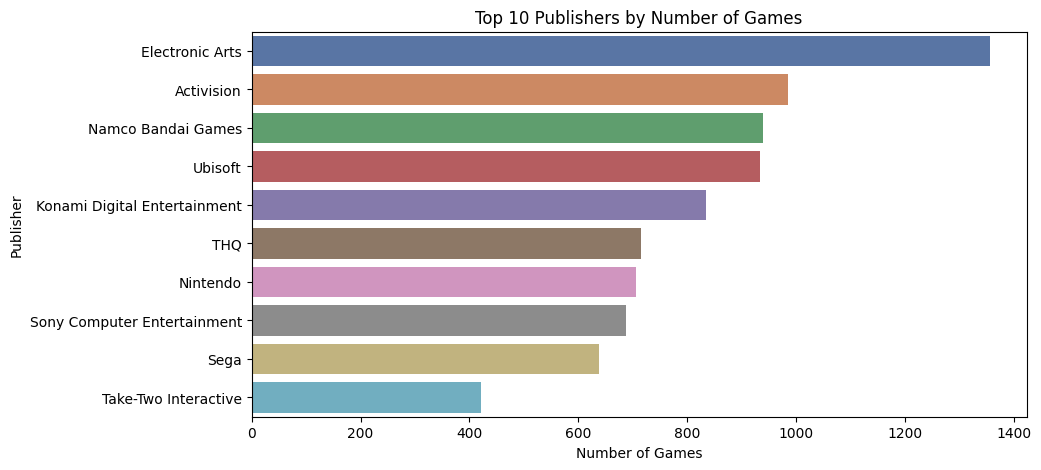

In [17]:
# Generate the deep color palette
deep_palette = sns.color_palette('deep')  # Create a color palette with distinct colors

# Set the figure size for the plot
plt.figure(figsize=(10, 5))  

# Create a bar plot
sns.barplot(x='Num_of_Games_of_Publisher', y='Publisher', data=top_publishers, hue='Publisher', dodge=False, palette=deep_palette,legend=False)

# Add titles and labels
plt.title('Top 10 Publishers by Number of Games') 
plt.xlabel('Number of Games')  
plt.ylabel('Publisher')  

plt.show()

##### From our perspective, The critical information is the ratio between the amount of games released and the amount of its global sales over the years. 
##### **or in another words**, the sales per game (for each publisher who sold more than 150 copies)

In [18]:
# Filter the DataFrame for publishers with more than 150 games
count_Pub_sale = count_Pub.loc[(count_Pub.Num_of_Games_of_Publisher > 150)].copy()

# Calculate Sales per Game
count_Pub_sale["Sales_Per_Game"] = count_Pub_sale["Global_Sales"] / count_Pub_sale["Num_of_Games_of_Publisher"]

# Sort by Sales Per Game
count_Pub_sale = count_Pub_sale.sort_values(by="Sales_Per_Game", ascending=False)
count_Pub_sale.head()

,Publisher,Num_of_Games_of_Publisher,Global_Sales,Sales_Per_Game
6,Nintendo,706,1788.81,2.533725
19,Microsoft Game Studios,191,248.32,1.300105
9,Take-Two Interactive,422,403.82,0.956919
7,Sony Computer Entertainment,687,606.48,0.882795
0,Electronic Arts,1356,1116.96,0.823717


##### Even thogh Nintendo(publisher) ranked **7th** in the amount of games released, they are leading the "Sales_Per_Game" category,by a significant margin! 

##### This can be clearly seen from the graph below

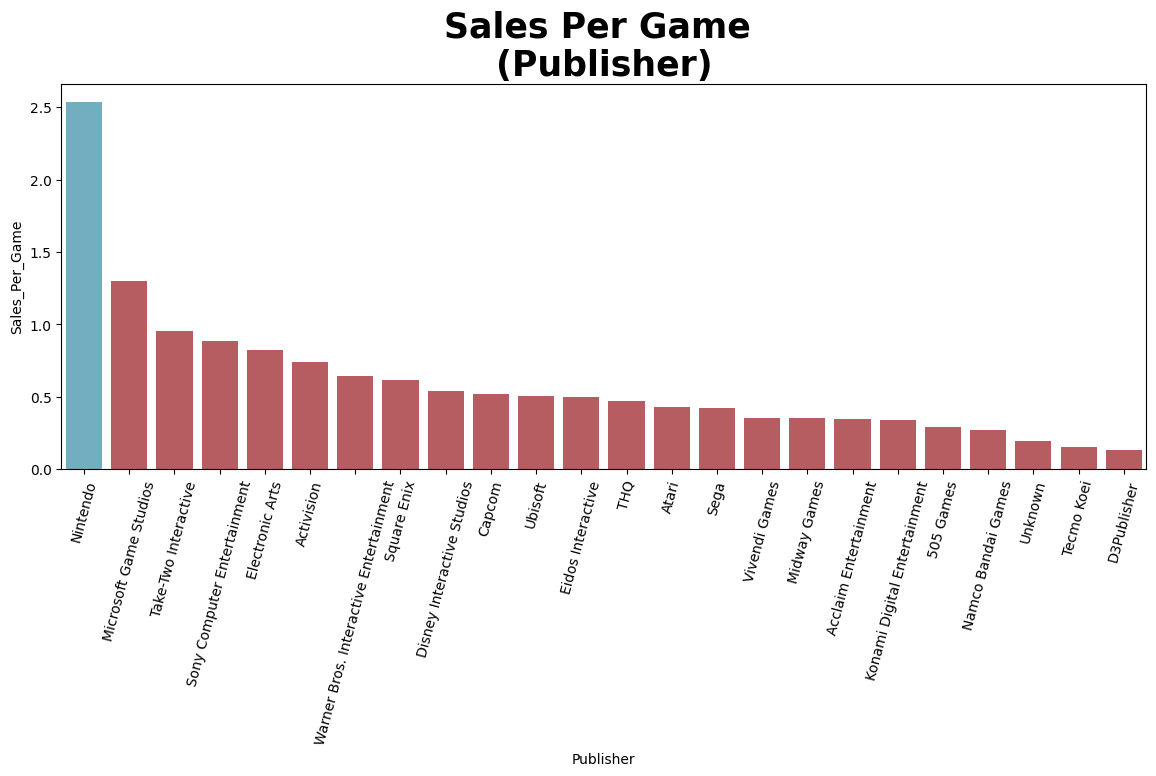

In [20]:
# Select specific colors from the deep color palette
red_color = deep_palette[9]
blue_color = deep_palette[3]

# Create a custom color palette
custom_palette = {'first': red_color, 'other': blue_color}

# Assign colors to the rows in 'count_Pub_sale'
count_Pub_sale['Color'] = ['first'] + ['other'] * (len(count_Pub_sale) - 1)  # Assign 'first' to the first row and 'other' to the rest

# Set the figure size for the plot
plt.figure(figsize=(14, 5))

# Create the bar plot
sns.barplot(data=count_Pub_sale, x='Publisher', y='Sales_Per_Game', hue='Color', palette=custom_palette, dodge=False,legend=False)
plt.title('Sales Per Game \n(Publisher)', size=25, fontweight="bold") 

# Rotate x-axis labels
plt.xticks(rotation=75)

plt.show()

### **Conclusion**
#### ***Nintendo*** **has the highest ratio of sales per game. An average of 2.5 million copies for each game they publish and Almost more than twice from the second place**

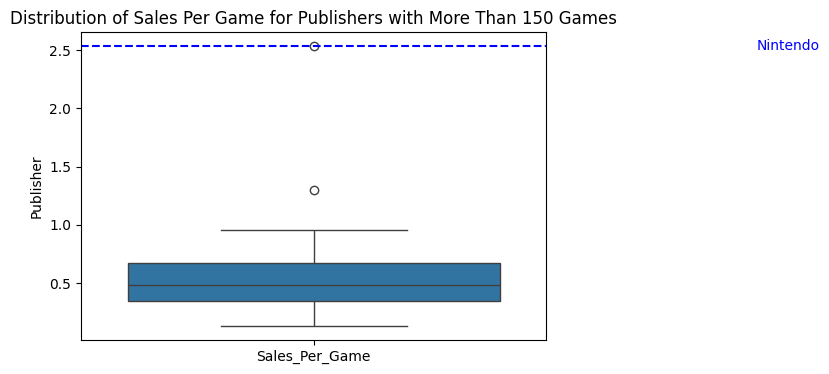

In [21]:
# Extract the value of 'Sales_Per_Game' for Nintendo
nintendo_value = count_Pub_sale[count_Pub_sale['Publisher'] == 'Nintendo']['Sales_Per_Game'].values[0]

# Plotting
plt.figure(figsize=(6, 4))
sns.boxplot(data=count_Pub_sale[['Sales_Per_Game']])

# Add a horizontal line and annotation to highlight Nintendo's value
plt.axhline(nintendo_value, color='blue', linestyle='--', label='Nintendo')
plt.text(1.02, nintendo_value, 'Nintendo', color='blue', ha='center', va='center', backgroundcolor='white')

# Add titles and labels
plt.title('Distribution of Sales Per Game for Publishers with More Than 150 Games')
plt.ylabel('Publisher')
plt.show()

##### It can be seen that the median is at 0.5. It can also be seen that Nintendo is positioned in a very exceptional location, which symbolizes its success.

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image2.jpg" width="500"/>
</div>


---

# **Platform comparison**
## ***Observation 2***


#1 ***Mobile comparison***  
#2 ***Stationary comparison***


### **1** Comparison between the ***mobile*** devices of Nintendo and Sony

##### We want to find out what are the differences between Sony and Nintendo in total global sales over the years

In [22]:
# Filter data for Sony and Nintendo mobile platforms
PS_mobile = myfile[myfile.Platform.isin(['PSP', 'PSV'])]
NIN_mobile = myfile[myfile.Platform.isin(['GB', 'GBA', 'DS', '3DS'])]

In [23]:
# Sum global sales for Sony and Nintendo mobile platforms
sony_mobile_sales = PS_mobile['Global_Sales'].sum()
nintendo_mobile_sales = NIN_mobile['Global_Sales'].sum()

In [24]:
# Create a DataFrame with the summed global sales
all_mobile = pd.DataFrame({
    'Platform': ['Sony mobile devices', 'Nintendo mobile devices'],
    'Global_Sales': [sony_mobile_sales, nintendo_mobile_sales]
})

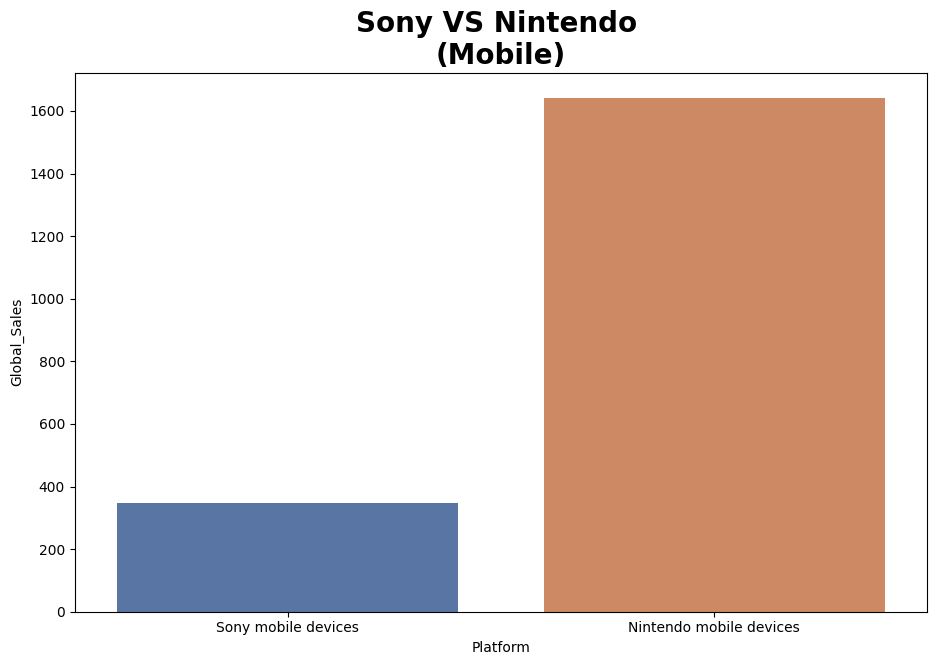

In [25]:
# Define a custom palette for the plot
palette = {'Sony mobile devices': deep_palette[0], 'Nintendo mobile devices': deep_palette[1]}

# Set the figure size for the plot
plt.figure(figsize=(11, 7))

# Plotting
sns.barplot(x="Platform", y="Global_Sales", data=all_mobile, hue="Platform", dodge=False, palette=palette,legend=False)

# Set the title
plt.title('Sony VS Nintendo \n(Mobile)', size=20, fontweight="bold")

plt.show()

##### The significant gap between Sony and Nintendo can be clearly seen !
##### Nintendo's mobile devices sold over 1.5 billion games copies compared to Sony's mobile devices that sold just 350 million games copies.
# <font color='firebrick'>K.O</font> for Sony PlayStation !

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 3.jpg" width="450"/>
</div>


### In addition, we are interested in testing whether Sony mobile devices has also failed in relation to the other platforms

In [26]:
# Group by 'Platform', aggregate both the count and sum of 'Global_Sales', sort by 'Num_of_Games' in descending order
count_comp_sale = (
    myfile.groupby("Platform")
    .agg(Num_of_Games=('Global_Sales', 'count'), Global_Sales=('Global_Sales', 'sum'))
    .sort_values(by="Num_of_Games", ascending=False)
    .reset_index()
)
count_comp_sale[count_comp_sale['Platform'].isin(['PSP', 'PSV'])]

,Platform,Num_of_Games,Global_Sales
5,PSP,1209,294.30
12,PSV,432,54.12


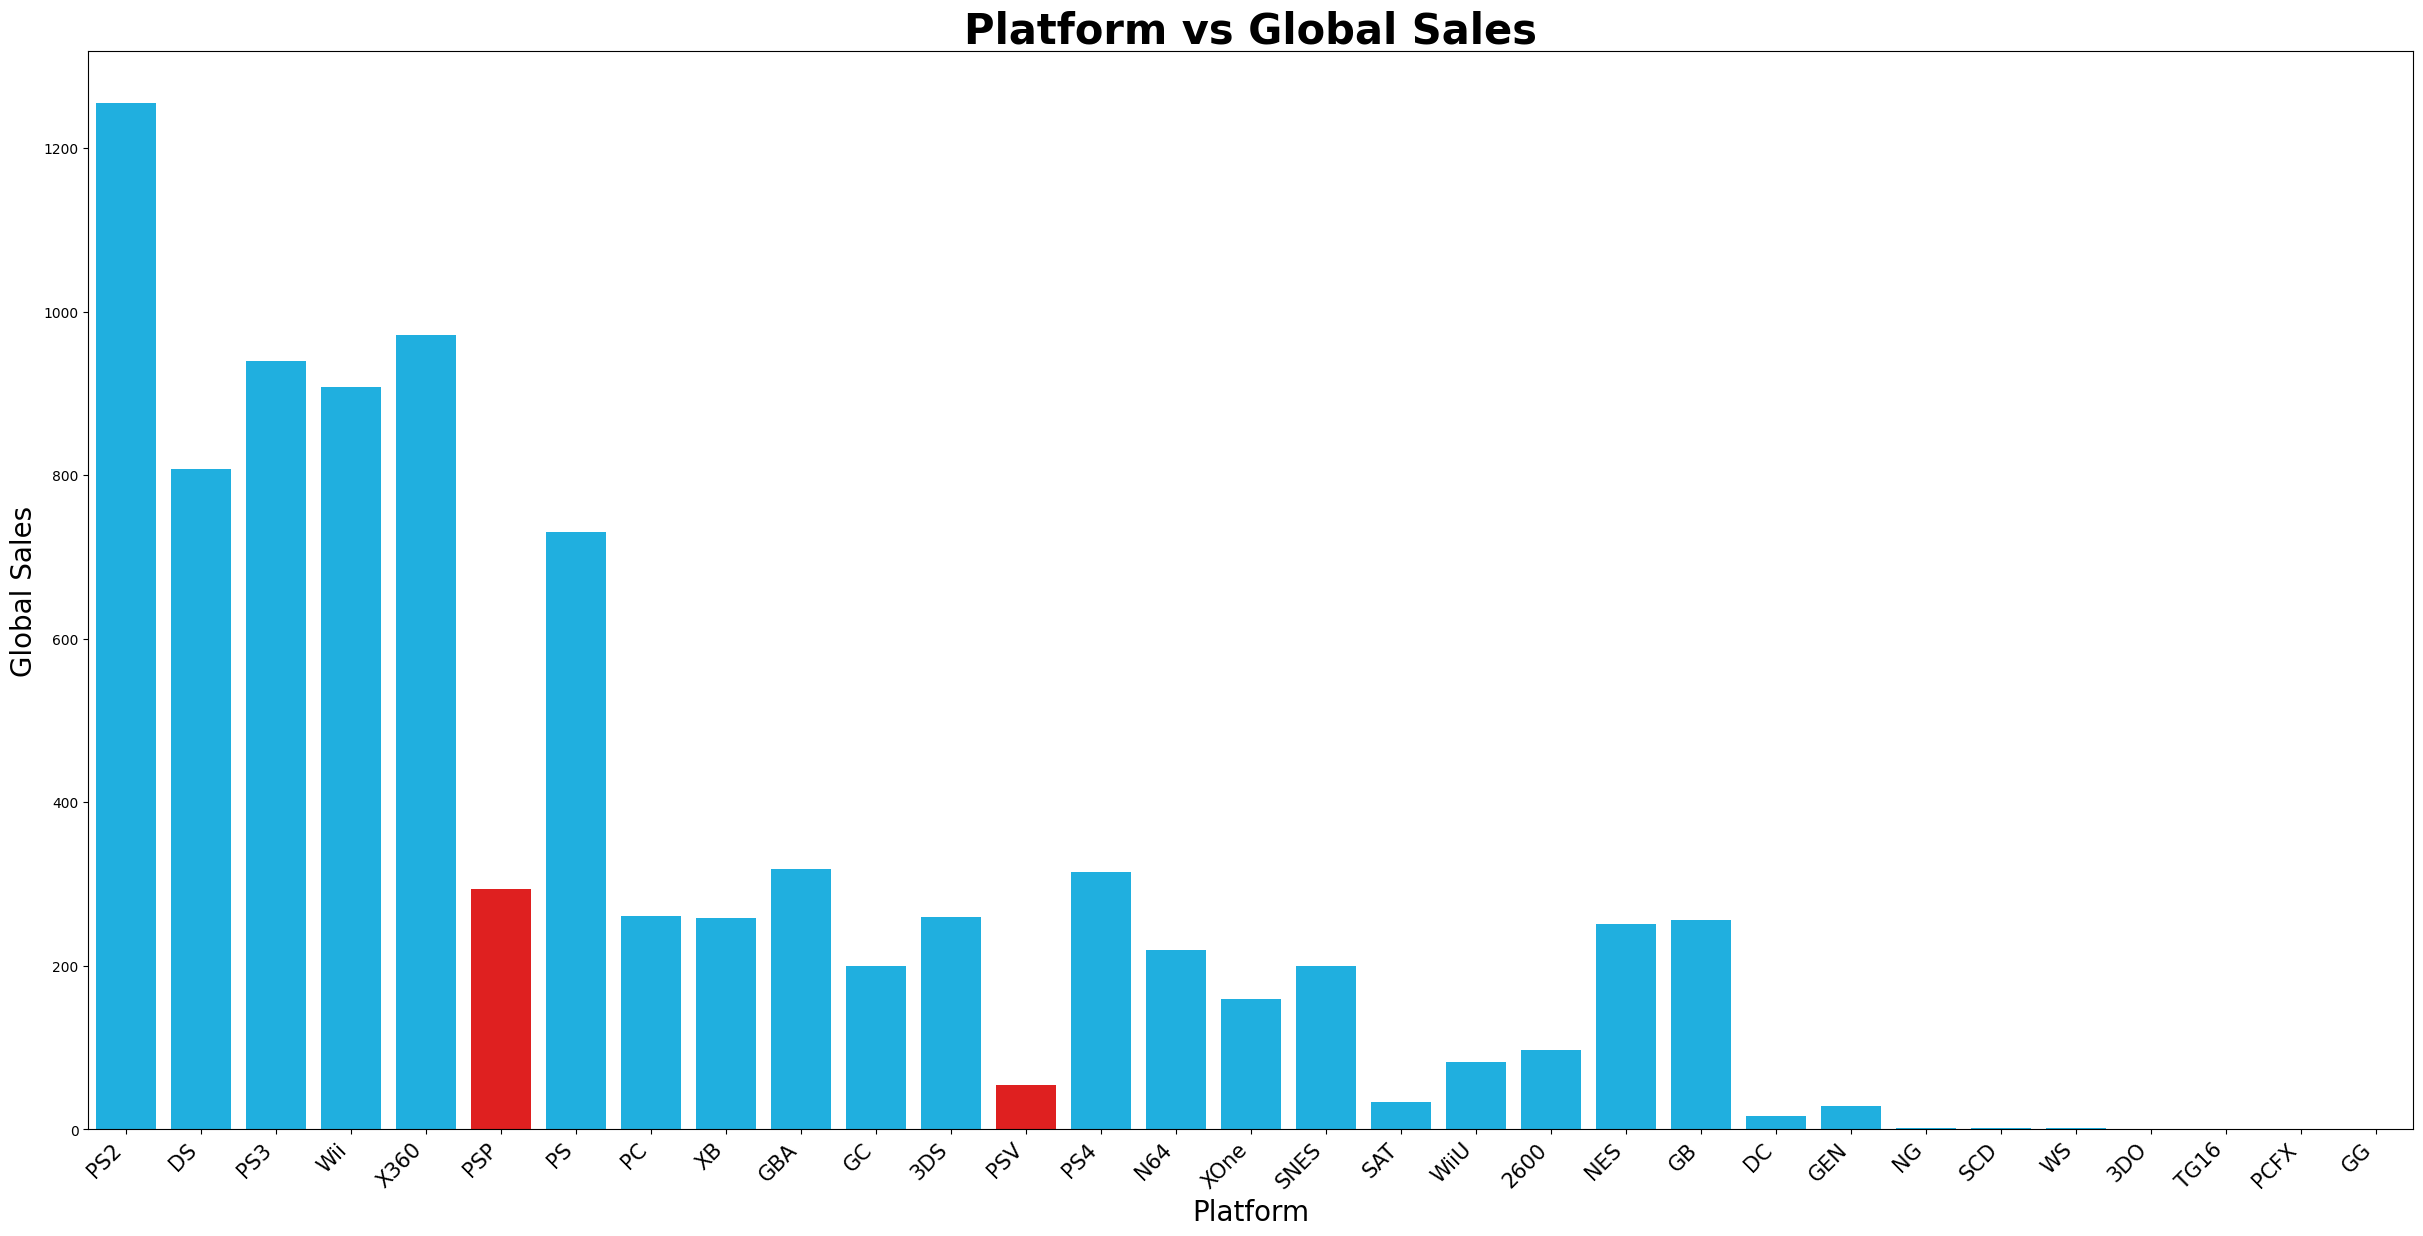

In [27]:
# Define highlight values
highlight_values = [294.30, 54.12]

# Assign colors based on highlight values
count_comp_sale['Color'] = ['red' if x in highlight_values else 'deepskyblue' for x in count_comp_sale.Global_Sales]

# Set the figure size for the plot
plt.figure(figsize=(30, 14)) 

# Create a bar plot
sns.barplot(x='Platform', y='Global_Sales', data=count_comp_sale, hue='Color', dodge=False, palette={'red': 'red', 'deepskyblue': 'deepskyblue'},legend=False)

# Add titles and labels
plt.title('Platform vs Global Sales', fontsize=30, fontweight='bold')  
plt.xlabel('Platform', fontsize=20)  
plt.ylabel('Global Sales', fontsize=20)  

# Set x-ticks and rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=15)  

plt.show()  

 The graph shows all right-to-left platforms in ascending order, according to the number of games sold over the years.
 PSV and PSP marked in red and We notice that The bar's height of PSV and PSP is very low in relation to the amount of games they had created.

## **Conclusion 1**
#### ***Sony's*** **mobile devices have failed miserably over the years in relation to all platforms !**


### **2** Comparison between the ***stationary*** devices of Nintendo, Sony and Xbox

##### We want to find out what are the differences between Nintendo, Sony and Xbox in total global sales over the years

In [28]:
# Filter data for Sony, Nintendo, and Xbox stationary platforms
PS_staionary = myfile[myfile.Platform.isin(['PS', 'PS2', 'PS3', 'PS4'])]
NIN_staionary = myfile[myfile.Platform.isin(['Wii', 'WiiU', 'NES', 'SNES', 'N64', 'GC'])]
XB_staionary = myfile[myfile.Platform.isin(['XB', 'X360', 'XOne'])]

In [29]:
# Sum global sales for each category
sony_staionary_sales = PS_staionary['Global_Sales'].sum()
nintendo_staionary_sales = NIN_staionary['Global_Sales'].sum()
xbox_staionary_sales = XB_staionary['Global_Sales'].sum()

In [30]:
# Create a DataFrame with the summarized sales
all_staionary = pd.DataFrame({
    'Platform': ['Sony stationary devices', 'Nintendo stationary devices', 'Xbox stationary devices'],
    'Global_Sales': [sony_staionary_sales, nintendo_staionary_sales, xbox_staionary_sales]
})

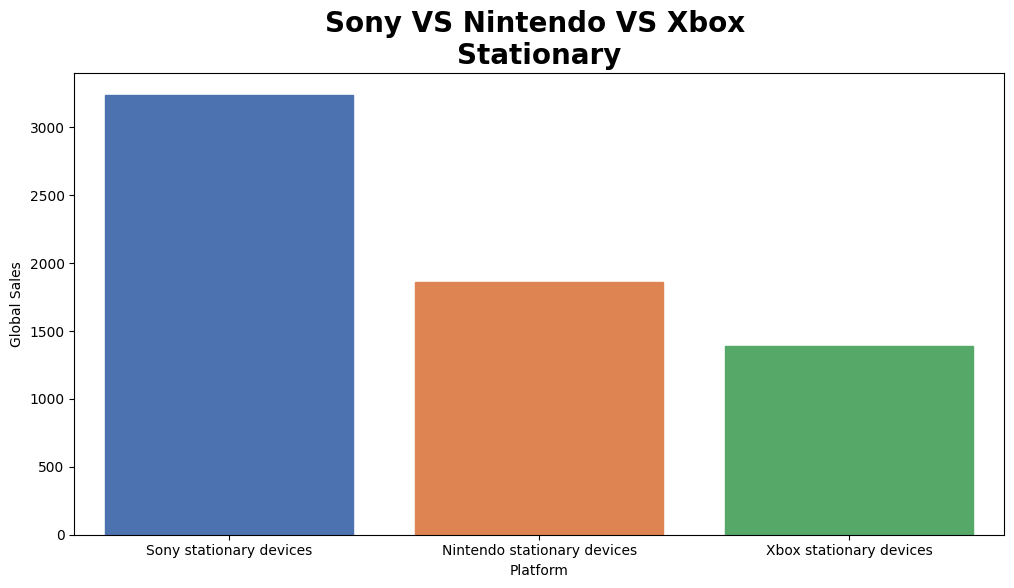

In [31]:
# Extract the specific colors from the 'deep' palette
blue_color = deep_palette[0]   
orange_color = deep_palette[1] 
green_color = deep_palette[2]  

# Define custom colors
colors = [blue_color, orange_color, green_color]

# Set the figure size for the plot
plt.figure(figsize=(12, 6)) 
# Create a bar plot
barplot = sns.barplot(x="Platform", y="Global_Sales", data=all_staionary, dodge=False)  # Create a bar plot without dodge

# Iterate over the bars and set their colors
for i, bar in enumerate(barplot.patches): 
    bar.set_color(colors[i % len(colors)])  

# Add titles and labels
plt.title('Sony VS Nintendo VS Xbox \nStationary', size=20, fontweight="bold") 
plt.xlabel('Platform')  
plt.ylabel('Global Sales')  


plt.show() 

##### It can be seen that ***Sony stationary consoles are the leading platform*** in the global sales market. We also conclude that Xbox does not constitute real competition.

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 4.jpg" width="500"/>
</div>


### We will check the amount of all global sales between the stationary consoles of Sony and Nintendo ***for each year separately***.
#### Between 1994-2016

In [32]:
# Define the year range
year_range = (myfile['Year_of_Release'] >= 1994) & (myfile['Year_of_Release'] <= 2016)


In [33]:
# Filter data for Sony and Nintendo platforms
ninfile = myfile[myfile.Platform.isin(['Wii', 'WiiU', 'NES', 'SNES', 'N64', 'GC']) & year_range]
psfile = myfile[myfile.Platform.isin(['PS', 'PS2', 'PS3', 'PS4']) & year_range]

In [34]:
# Group by Year_of_Release and sum the Global_Sales
nin_group = ninfile.groupby("Year_of_Release")['Global_Sales'].sum().reset_index()
ps_group = psfile.groupby("Year_of_Release")['Global_Sales'].sum().reset_index()

In [35]:
# Rename the columns for clarity
nin_group.rename(columns={'Global_Sales': 'Total_NIN'}, inplace=True)
ps_group.rename(columns={'Global_Sales': 'Total_PS'}, inplace=True)

In [36]:
# Merge the two DataFrames on 'Year_of_Release', performing an outer join and filling NaN values with 0
ps_nin = pd.merge(ps_group, nin_group, on='Year_of_Release', how='outer').fillna(0)

<Figure size 2400x1000 with 0 Axes>

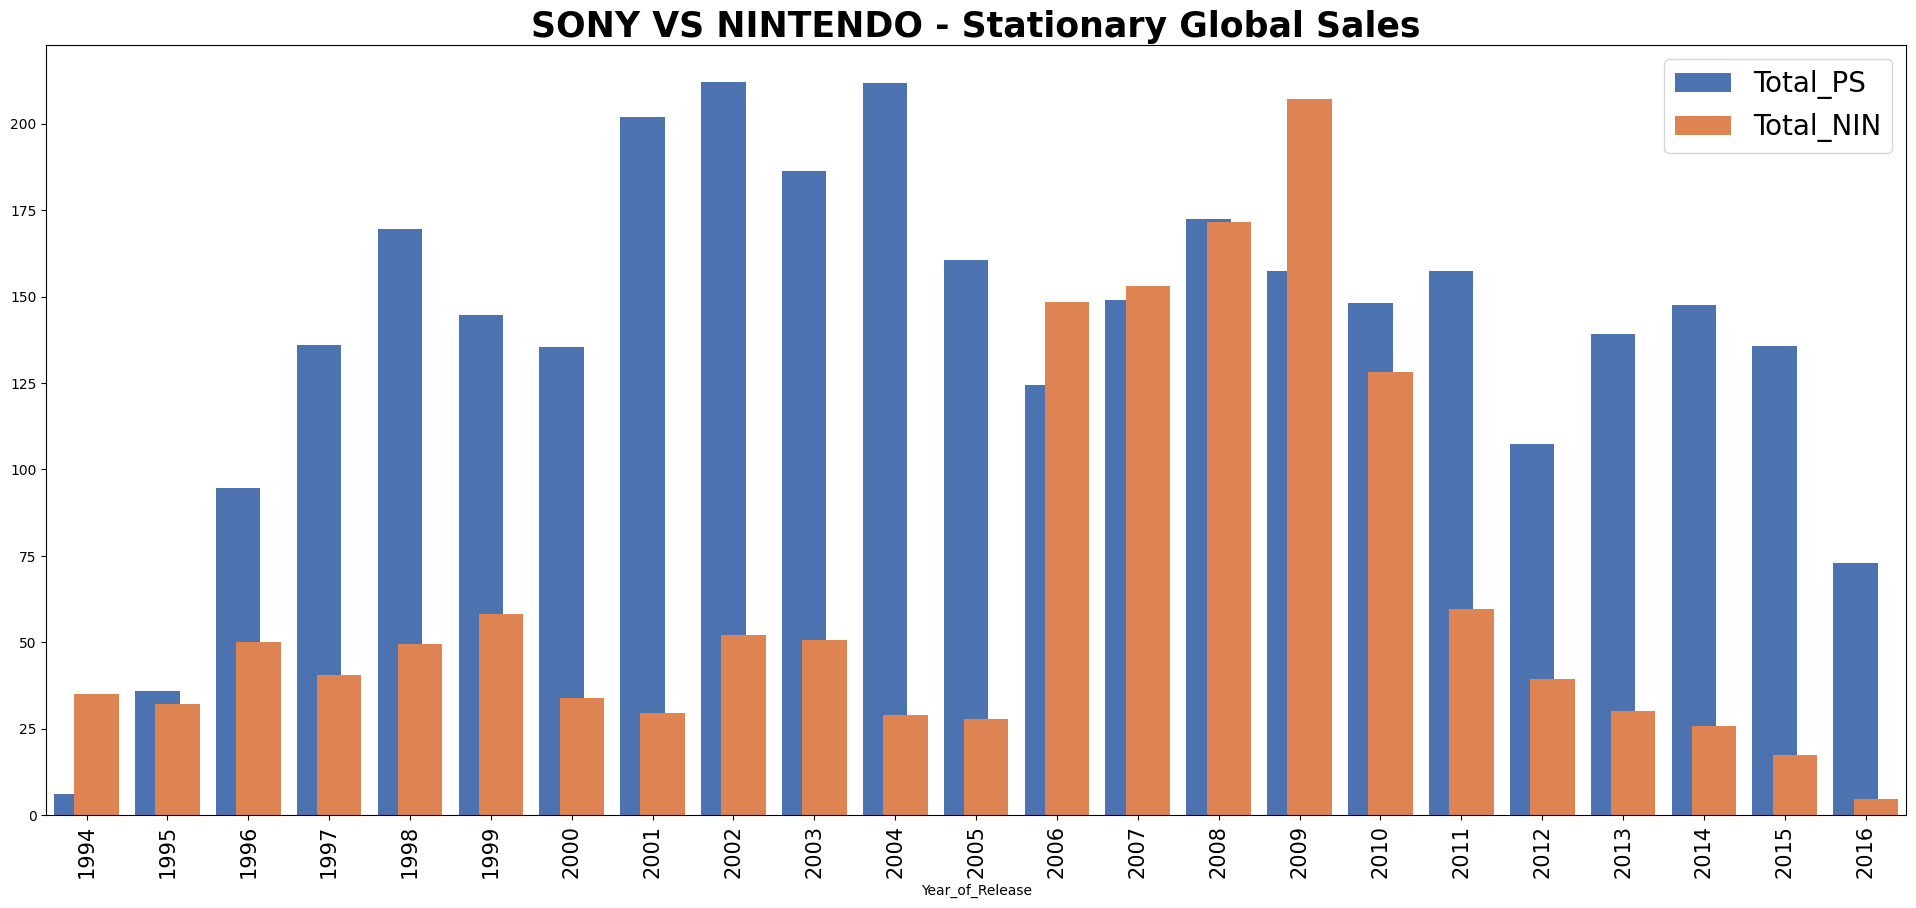

In [37]:

# Set the figure size for the plot
plt.figure(figsize=(24, 10)) 

# Create a bar plot with custom colors using the deep palette
ax = ps_nin.plot.bar(x='Year_of_Release', y=['Total_PS', 'Total_NIN'], figsize=(24, 10), color=[deep_palette[0], deep_palette[1]])

# Change the width of the bars
new_width = 0.55  # Desired width
for patch in ax.patches:
    current_width = patch.get_width()  # Get the current width of the bar
    diff = current_width - new_width  # Calculate the difference to the new width
    patch.set_width(new_width)  # Set the new width
    patch.set_x(patch.get_x() + diff * .5)  # Adjust the bar's x position

# Set the title
ax.set_title('SONY VS NINTENDO - Stationary Global Sales', size=25, fontweight="bold")  # Add a title with specific size and font weight

# Set legend font size
plt.legend(fontsize=20)  

# Set x-ticks and adjust font size for better readability
ax.set_xticks(range(len(ps_nin.index)))  # Set the positions of the x-ticks
ax.set_xticklabels(ps_nin['Year_of_Release'], ha="center", fontsize=15)  # Set the labels of the x-ticks with better readability

plt.show()  

wii year of release is 2006

In [38]:
min_wii_year = myfile[myfile.Platform == 'Wii']['Year_of_Release'].min()
min_wii_year

2006

### **Conclusion**

#### 1. since SonyPlaystation started to release video games for stores, it can be seen that it was gifted with great success, and its total global sales were much higher than Nintendo.
#### 2. therefore we notice from the graph, that in 2006 there is a significant raise in Nintendo's global sales. That is because in 2006 WII console was released, that raised the global sales volume and even passed SonyPlaystation between the years 2006-2009
#####

### *In order to determine the battle between those 2 video games giants, we will merge the global sales data of the mobile devices with the stationary consoles.*
##### we can't wait to see the results.... 

In [39]:
# Group sales data by Platform and calculate Global Sales
group_sales = myfile.groupby("Platform")[["Global_Sales"]].sum().sort_values(by="Global_Sales", ascending=False).reset_index()

In [40]:
# Calculate the percentage of global sales
tot_sales = group_sales["Global_Sales"].sum()
group_sales["%Global_Sales%"] = group_sales["Global_Sales"] / tot_sales

In [41]:
# Define platforms for Sony and Nintendo
sony_platforms = ["PS", "PS2", "PS3", "PS4", "PSP", "PSV"]
nintendo_platforms = ["Wii", "DS", "WiiU", "NES", "SNES", "N64", "GBA", "3DS", "GC", "GB"]

In [42]:
# Define the explode and color settings for the pie charts
sony_explode = [0.07 if x in sony_platforms else 0 for x in group_sales["Platform"]]
sony_colors = ["red" if x in sony_platforms else "deepskyblue" for x in group_sales["Platform"]]

nintendo_explode = [0.07 if x in nintendo_platforms else 0 for x in group_sales["Platform"]]
nintendo_colors = ["limegreen" if x in nintendo_platforms else "orange" for x in group_sales["Platform"]]

In [43]:
# Define the autopct functions
def sony_autopct(pct):
    return ('%.1f%%' % pct) if pct > 3 else ""

def nintendo_autopct(pct):
    return ('%.1f%%' % pct) if pct > 0.7 else ""

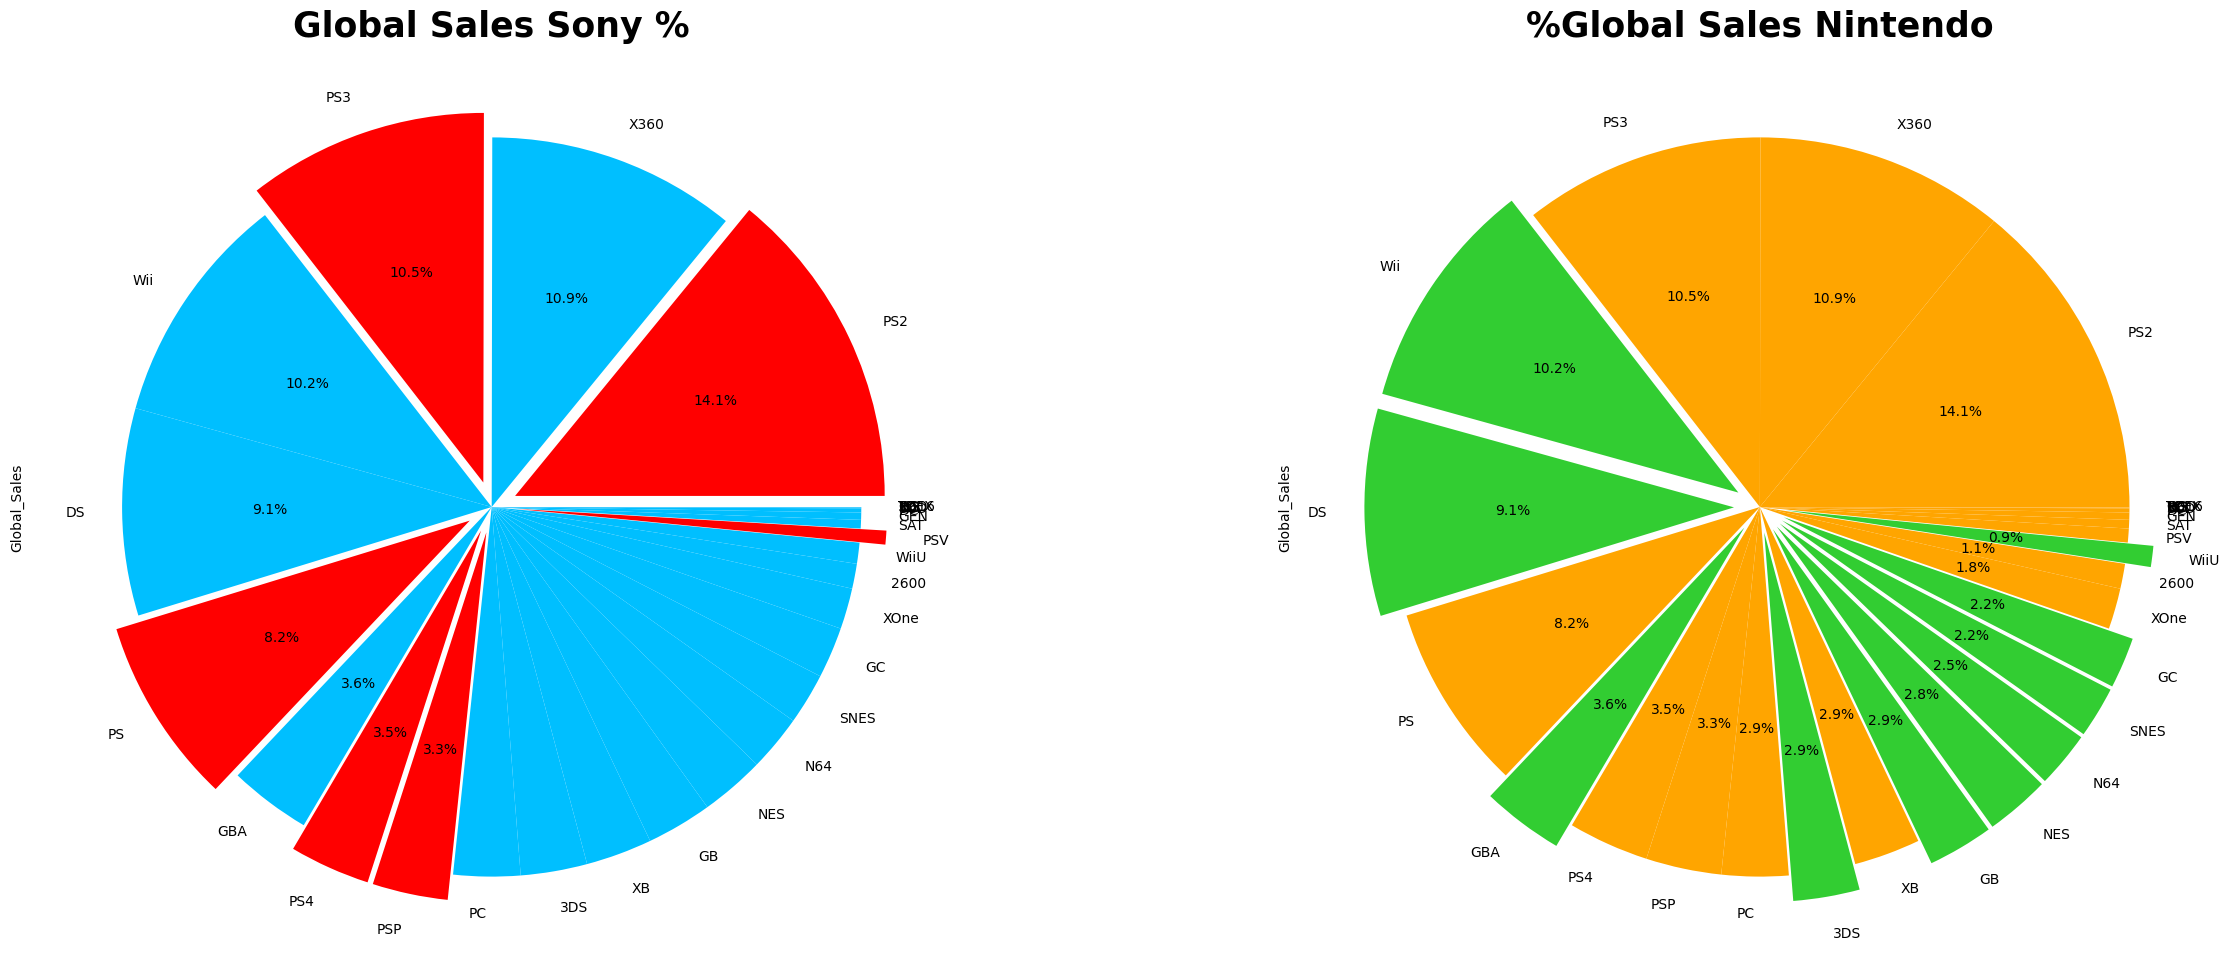

In [44]:
# Plot the pie charts
plt.figure(figsize=(30, 12))

# Sony Pie Chart
plt.subplot(1, 2, 1)
plt.title("Global Sales Sony %", fontweight="bold", fontsize=25)
group_sales["Global_Sales"].plot(kind='pie', autopct=sony_autopct, labels=group_sales["Platform"], explode=sony_explode, colors=sony_colors)

# Nintendo Pie Chart
plt.subplot(1, 2, 2)
plt.title("%Global Sales Nintendo", fontweight="bold", fontsize=25)
group_sales["Global_Sales"].plot(kind='pie', autopct=nintendo_autopct, labels=group_sales["Platform"], explode=nintendo_explode, colors=nintendo_colors)

plt.show()


### **Conclusion** 
#### ****it's a TIE!!!**** almost...
##### The Total Global Sales of Sony constitutes **40.02%** of the total global sales.
##### The Total Global Sales of Nintendo constitutes **39.2%** percent of the total global sales

### Both companies are Originally from ***Japan***

### Sony and Nintendo are The most succesfull companies for video games (make up about ***80%*** of the global market share)

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 5.jpg" width="500"/>
</div>


---

# **Comparison between areas**
## ***Observation 3***

### We will examine differences in purchases by genres divided into purchase areas:


In [45]:
# Select relevant features and group by Genre, then sum the values
features = myfile[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
All_Sales = features.groupby('Genre').sum().reset_index()

In [46]:
# Calculate the percentage sales for each region
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_columns:
    All_Sales[f'Percent_{col}'] = (All_Sales[col] / All_Sales['Global_Sales'] * 100).round(3)

In [47]:
# Select the relevant percentage columns for plotting
illustration = All_Sales[['Genre', 'Percent_NA_Sales', 'Percent_EU_Sales', 'Percent_JP_Sales', 'Percent_Other_Sales']].set_index('Genre')

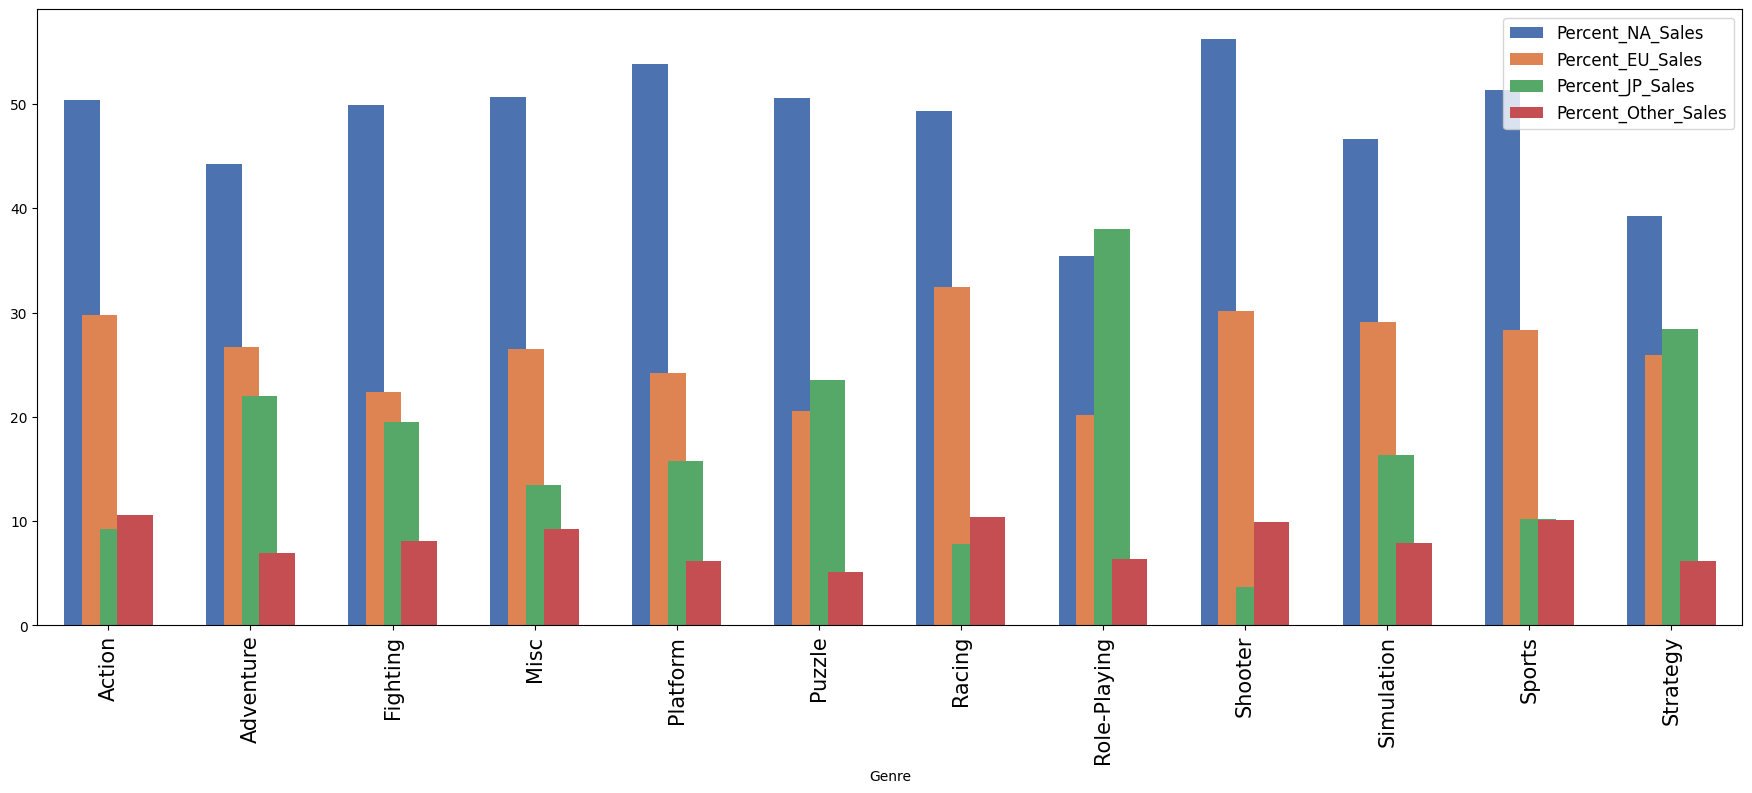

In [50]:
# Create a bar plot
ax = illustration.plot.bar(figsize=(22, 8),color = deep_palette)

plt.legend(fontsize=12)

# Function to change bar width
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

# Apply the change_width function
change_width(ax, .25)

# Set x-ticks and adjust font size for better readability
ax.set_xticks(range(len(illustration.index)))
ax.set_xticklabels(illustration.index, ha="center", fontsize=15)

plt.show()

##### From this plot we can understand the size of the American market. it constitutes a huge part of the total global sales. it noticeable in every genre. almost 50% of all sales except in one genre

### Once we understood the size of the US market we will continue to go into the depths of this market and we will get more insights on it

In [51]:
# Combine data preparation steps
top_global_sales = myfile.groupby('Platform')['Global_Sales'].sum().nlargest(5).reset_index()
top_na_sales = myfile.groupby('Platform')['NA_Sales'].sum().nlargest(5).reset_index()

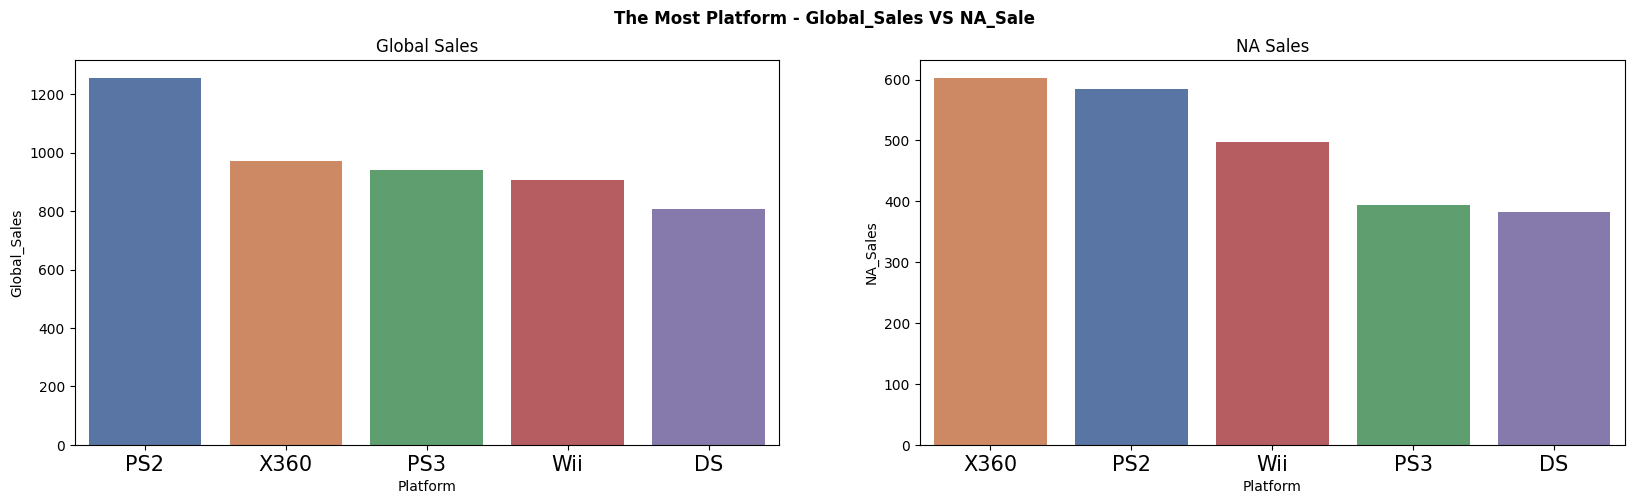

In [53]:
# Ensure consistent ordering and coloring by merging the unique platforms
unique_platforms = pd.concat([top_global_sales['Platform'], top_na_sales['Platform']]).drop_duplicates()

# Create a dictionary mapping platforms to colors
platform_colors = {platform: color for platform, color in zip(unique_platforms, deep_palette)}

# Create a list of colors for each dataset
global_colors = [platform_colors[platform] for platform in top_global_sales['Platform']]
na_colors = [platform_colors[platform] for platform in top_na_sales['Platform']]

# Create subplots
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
fig.suptitle("The Most Platform - Global_Sales VS NA_Sale", fontweight="bold")

# Plot for Global Sales
sns.barplot(ax=axes[0], data=top_global_sales, x='Platform', y='Global_Sales', hue='Platform', dodge=False, palette=platform_colors)
axes[0].legend([], [], frameon=False)  # Remove the legend
axes[0].set_title('Global Sales')

# Plot for NA Sales
sns.barplot(ax=axes[1], data=top_na_sales, x='Platform', y='NA_Sales', hue='Platform', dodge=False, palette=platform_colors)
axes[1].legend([], [], frameon=False)  # Remove the legend
axes[1].set_title('NA Sales')

# Set x-ticks and labels for both plots
for ax, sales in zip(axes, [top_global_sales, top_na_sales]):
    ax.set_xticks(range(len(sales['Platform'])))
    ax.set_xticklabels(sales['Platform'], ha="center", fontsize=15)

plt.show()

##### After realizing that the US market is considered a large share (50%) of all global sales we wanted to check if this percentage also overlaps with the best selling consoles in the world. and the answer is **yes**! we can see from the graphs that the best selling consoles in the world are the same consoles who sold in the US. that insight clearly illustrates the impact of the American market on the world 

### We want to check whether there is a difference in the popularity of the genres between the Eastern culture and Western culture

In [54]:
# Function that Calculates the percentage distribution of sales by genre and style the top genres.
def calculate_genre_percentage_and_style(df, sales_column, threshold):
    genre_sales = df[["Genre", sales_column]].groupby("Genre").sum().reset_index()
    sales_sum = genre_sales[sales_column].sum()
    genre_sales['Division by genre in %'] = ((genre_sales[sales_column] / sales_sum) * 100).round(3)
    genre_sales = genre_sales.sort_values(by='Division by genre in %', ascending=False).reset_index(drop=True)
    
    # Style the top genres
    genre_sales['Style'] = genre_sales['Division by genre in %'].apply(
        lambda x: 'turquoise' if x > threshold else 'white'
    )
    
    return genre_sales

In [55]:
# Calculate the division by genre in percentage and style for each region
na_sales_genre = calculate_genre_percentage_and_style(myfile, "NA_Sales", 13)
eu_sales_genre = calculate_genre_percentage_and_style(myfile, "EU_Sales", 13)
jp_sales_genre = calculate_genre_percentage_and_style(myfile, "JP_Sales", 10.4)

In [56]:
# Function to create a color palette dictionary
def create_color_palette(df):
    color_palette = {}
    for index, row in df.iterrows():
        color_palette[row['Genre']] = row['Style']
    return color_palette

# Create the color palettes for each plot
na_palette = create_color_palette(na_sales_genre)
eu_palette = create_color_palette(eu_sales_genre)
jp_palette = create_color_palette(jp_sales_genre)

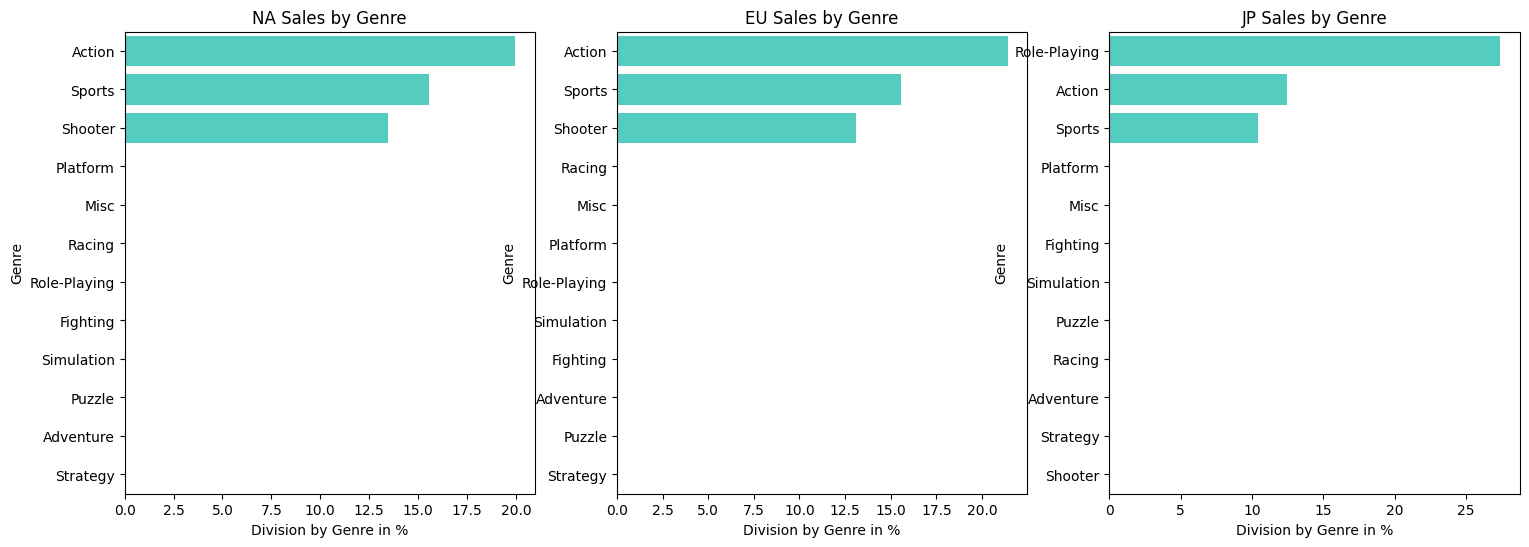

In [57]:
# Plot the results
fig, axes = plt.subplots(figsize=(18, 6), ncols=3)

# Plot for NA Sales
sns.barplot(ax=axes[0], data=na_sales_genre, x='Division by genre in %', y='Genre', hue='Genre', dodge=False, palette=na_palette)
axes[0].legend([], [], frameon=False)  # Remove the legend
axes[0].set_title('NA Sales by Genre')
axes[0].set_xlabel('Division by Genre in %')
axes[0].set_ylabel('Genre')

# Plot for EU Sales
sns.barplot(ax=axes[1], data=eu_sales_genre, x='Division by genre in %', y='Genre', hue='Genre', dodge=False, palette=eu_palette)
axes[1].legend([], [], frameon=False)  # Remove the legend
axes[1].set_title('EU Sales by Genre')
axes[1].set_xlabel('Division by Genre in %')
axes[1].set_ylabel('Genre')

# Plot for JP Sales
sns.barplot(ax=axes[2], data=jp_sales_genre, x='Division by genre in %', y='Genre', hue='Genre', dodge=False, palette=jp_palette)
axes[2].legend([], [], frameon=False)  # Remove the legend
axes[2].set_title('JP Sales by Genre')
axes[2].set_xlabel('Division by Genre in %')
axes[2].set_ylabel('Genre')

plt.show()

### **Conclusion**

#### It can be seen that there are significant differences in the choice of genre in the West (Europe and USA) and the East (Japan)
#### as we can see,in north america and europe the users like to be "active" while they playing,so they prefer games with action and movement and less "thinking games". However the japanese defenetly prefer "role-playing" games with "connection to the game character" and much more thinking.

## ***The Subprime crisis***

<Axes: xlabel='Year_of_Release'>

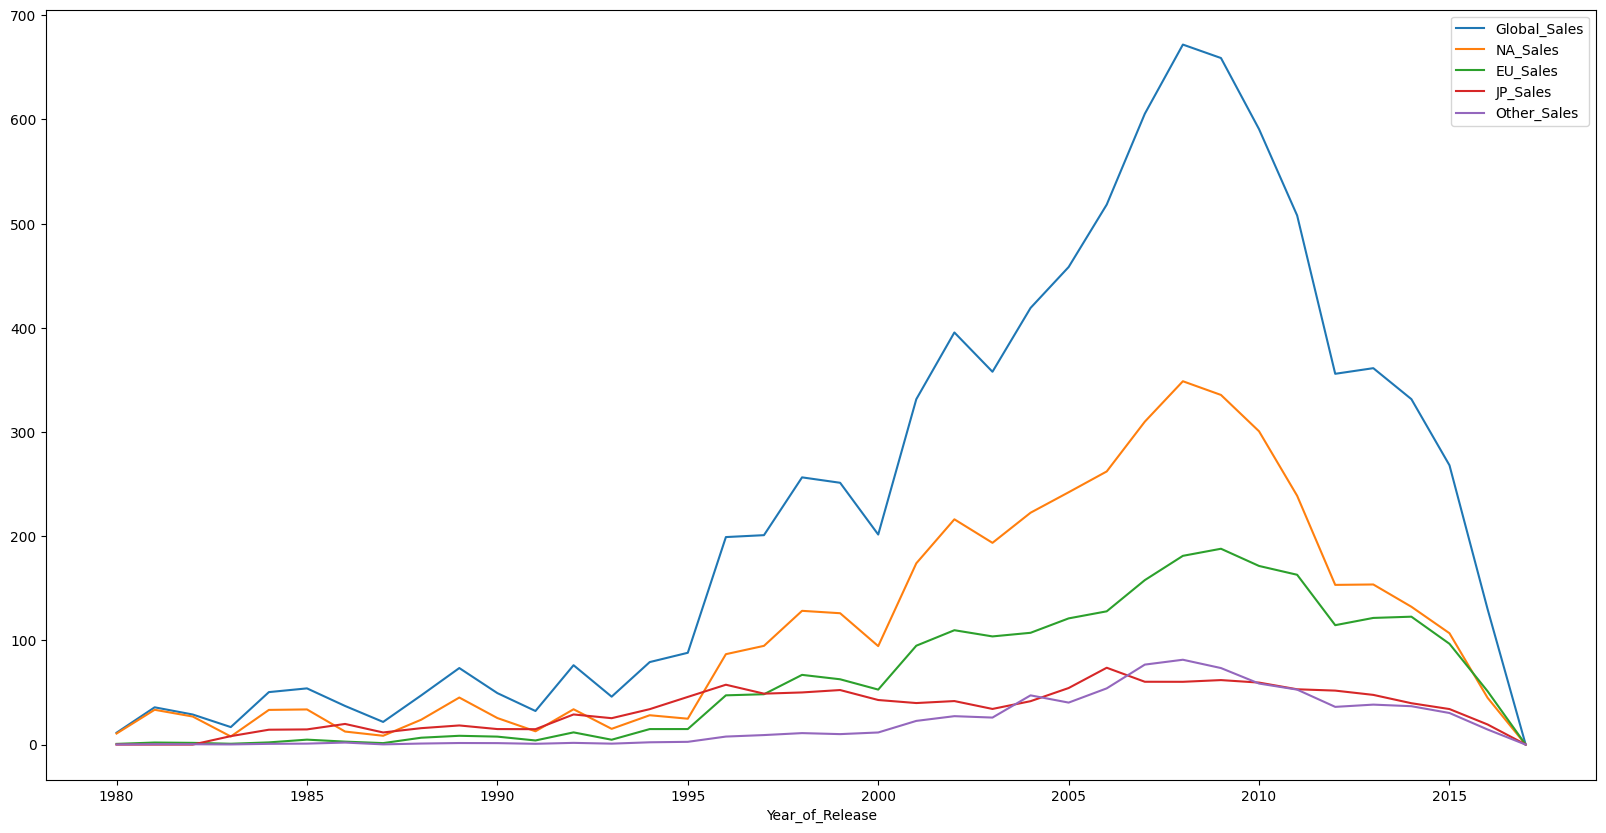

In [58]:
# Group by 'Year_of_Release' and sum the sales for each region
Global_Sales_Year = myfile.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']].sum()

# Slice the data Untill 2016
Global_Sales_Year = Global_Sales_Year.iloc[:-1]

#Plot the sales data over the years
Global_Sales_Year.plot(figsize = (20,10))

##### From the above graph it can be seen that there was a change in the trend of purchasing video games in 2008-2009.

### **Conclusion**
#### After an in-depth study, we realized that the Subprime crisis in 2008 had a profound effect on the whole world. It can be seen that the biggest changes were in the US but also in the rest of the world.

___

<div>
  <img src="https://raw.githubusercontent.com/guyuliel/Data-Analysis-Project/main/images/image 7.jpg" width="700"/>
</div>
